In [1]:
# Remember to set Runtime > Change runtime type to one with a GPU.

# Setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [2]:
# Find the Face Mask dataset on Google drive -- the drive was mounted as part of the default setup
import os
os.listdir("/content/gdrive/MyDrive/EAI6010")


['FaceMask.zip', 'BrainTumor.zip', 'Fruits.zip', 'CatandDog.zip']

In [3]:
# Unzip the data set
!unzip "/content/gdrive/MyDrive/EAI6010/Fruits.zip"
print( "\n\n" )
os.listdir( )

Archive:  /content/gdrive/MyDrive/EAI6010/Fruits.zip
replace MY_data/predict/0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 




['.config', 'annotations', 'images', 'gdrive', 'MY_data', 'sample_data']

In [4]:
# Let's see what's in the extracted data
print( f"root directory:\n{os.listdir( 'MY_data' )}\n\n'train' directory:\n{os.listdir( 'MY_data/train' )}\n\n'watermelon' image directory:\n{os.listdir( 'MY_data/train/watermelon')}" )

root directory:
['predict', 'test', 'train']

'train' directory:
['orange', 'cherry', 'Banana', 'mango', 'Apple', 'watermelon', 'avocado', 'pinenapple', 'strawberries', 'kiwi']

'watermelon' image directory:
['img_1741.jpeg', 'img_6391.jpeg', 'img_2121.jpeg', 'img_5431.jpeg', 'img_5671.jpeg', 'img_5941.jpeg', 'img_3561.jpeg', 'img_5321.jpeg', 'img_1481.jpeg', 'img_1811.jpeg', 'img_4681.jpeg', 'img_2491.jpeg', 'img_3191.jpeg', 'img_5501.jpeg', 'img_2411.jpeg', 'img_3031.jpeg', 'img_3431.jpeg', 'img_2511.jpeg', 'img_1781.jpeg', 'img_4721.jpeg', 'img_4431.jpeg', 'img_2051.jpeg', 'img_3321.jpeg', 'img_2981.jpeg', 'img_4621.jpeg', 'img_1641.jpeg', 'img_3251.jpeg', 'img_6371.jpeg', 'img_6041.jpeg', 'img_3821.jpeg', 'img_4401.jpeg', 'img_5291.jpeg', 'img_1351.jpeg', 'img_6251.jpeg', 'img_5741.jpeg', 'img_4881.jpeg', 'img_5371.jpeg', 'img_5301.jpeg', 'img_1981.jpeg', 'img_2611.jpeg', 'img_5911.jpeg', 'img_1721.jpeg', 'img_2881.jpeg', 'img_4771.jpeg', 'img_3411.jpeg', 'img_1451.jpeg', 'img_3811

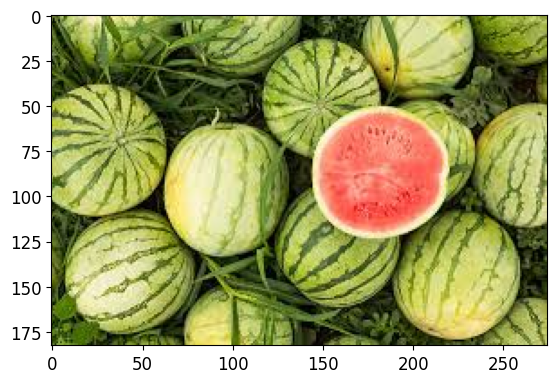

In [5]:
# What does an image look like?
images_dir_path = 'MY_data/train'
file_path = os.path.join( images_dir_path, "watermelon" )
file_path = os.path.join( file_path, "img_2121.jpeg" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

In [6]:
# Lets create a data block -- this is a wrapper around the original data to make
# it easier to get to a normalized view
block = DataBlock( # https://docs.fast.ai/data.block.html
    blocks = ( ImageBlock, CategoryBlock ), # x = image, y = label
    get_items = get_image_files, # items are images
    splitter = RandomSplitter( seed = 42 ), # randomly assign sample to train-validation - https://docs.fast.ai/data.transforms.html#RandomSplitter
    get_y = parent_label, # how to get the category?
    item_tfms = Resize( 256 ), # apply this to each item -- verify that the dimensions are the same, even though this dataset says they are they are not
    batch_tfms = aug_transforms( ) #  augmentation transforms -- https://docs.fast.ai/vision.augment.html#aug_transforms
    )

# Lets use the data block to create a data loader
loaders = block.dataloaders( images_dir_path )
print( f"loaders:\n{loaders}" )

loaders:


In [18]:
# Let's create a learner using an existing model -- loss_func is implicitly set
learner = vision_learner(
    loaders, # where the data comes from
    efficientnet_v2_s, # one of pre-trained models (https://pytorch.org/vision/stable/models.html)
    metrics = error_rate # supplementary validation metrics to display while training
    )

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_S_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Lets train for a single epoch to confirm all things are set up properly
learner.fine_tune( 1 )

# What is fine_tune doing & why are there two epochs when we specified only one?
# - the model is frozen except the new output layer
# - we do a single training epoch on the output layer
# - the model is unfrozen
# - we run the specified number of epochs, in this case 1, on the entire model

epoch,train_loss,valid_loss,error_rate,time
0,1.691720,0.471584,0.126087,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.520703,0.372529,0.106522,00:28


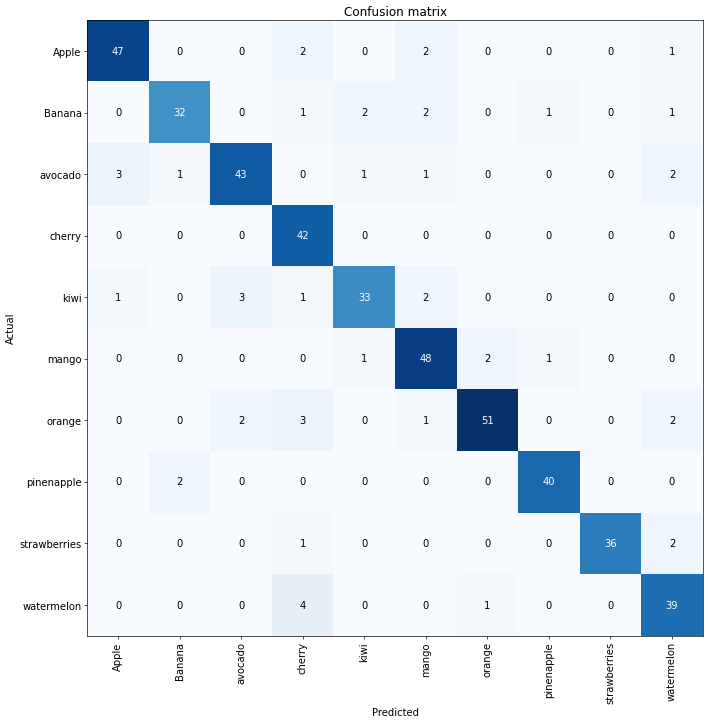

In [9]:
#  What is our starting state?
#
#  Validation data is used to calculate confusion matrix.
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )

# Pretty darn good...
# - some classes that get confused, specifically dense-medium residential
# - since we randomly split, we can see some slight imbalance, but nothing too terrible

LR suggestion = 1.10e-04


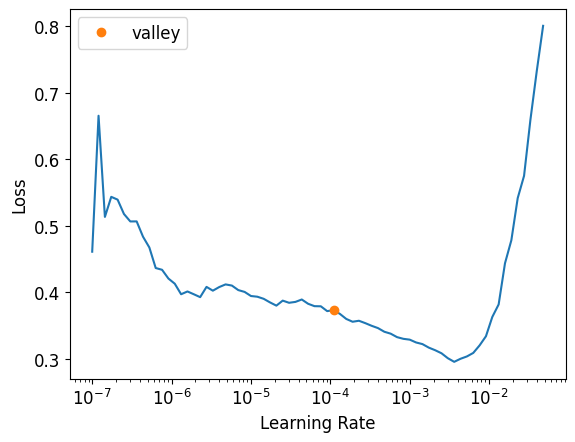

In [10]:
# What's a good learning rate for this model-problem?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [11]:
# We could tinker in more detail with the layer training, but let's just run
# fine_tune a couple of times with the preferred learning rate and see if that
# gets us to a good spot
for i in range( 10 ):
  print( f"\n\nfine tuning iteration #{i+1}" )
  learner.fine_tune( 1, base_lr = 1.10e-04 )



fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,0.402234,0.339013,0.089130,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.410522,0.342868,0.097826,00:29




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,0.357875,0.335417,0.091304,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.340873,0.339109,0.097826,00:29




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,0.343277,0.330212,0.086957,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.380994,0.315107,0.086957,00:29




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,0.364892,0.308212,0.082609,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.335628,0.295658,0.082609,00:30




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,0.338267,0.297384,0.071739,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.352382,0.298023,0.071739,00:30




fine tuning iteration #6


epoch,train_loss,valid_loss,error_rate,time
0,0.333443,0.296155,0.073913,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.332385,0.293027,0.071739,00:30




fine tuning iteration #7


epoch,train_loss,valid_loss,error_rate,time
0,0.326024,0.285194,0.067391,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.286360,0.280190,0.067391,00:30




fine tuning iteration #8


epoch,train_loss,valid_loss,error_rate,time
0,0.263336,0.282935,0.073913,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.307904,0.285650,0.067391,00:30




fine tuning iteration #9


epoch,train_loss,valid_loss,error_rate,time
0,0.273641,0.271255,0.067391,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.274792,0.263656,0.071739,00:30




fine tuning iteration #10


epoch,train_loss,valid_loss,error_rate,time
0,0.305809,0.263143,0.065217,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.271359,0.270950,0.073913,00:30


LR suggestion = 1.91e-04


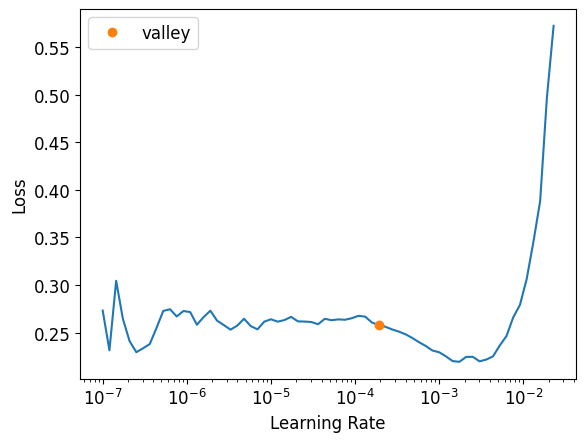

In [12]:
# Did the recommended learning rate change?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [13]:
# Let's adjust and train a bit more -- we should get to a point
# where we should clearly stop training
for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+1}" )
  learner.fine_tune( 1, base_lr = 1.91e-04 )



fine tuning iteration #1


epoch,train_loss,valid_loss,error_rate,time
0,0.268379,0.253461,0.067391,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.282574,0.263410,0.073913,00:30




fine tuning iteration #2


epoch,train_loss,valid_loss,error_rate,time
0,0.273546,0.258255,0.071739,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.258181,0.251092,0.063043,00:33




fine tuning iteration #3


epoch,train_loss,valid_loss,error_rate,time
0,0.243385,0.251179,0.069565,00:23


epoch,train_loss,valid_loss,error_rate,time
0,0.259962,0.244568,0.060870,00:31




fine tuning iteration #4


epoch,train_loss,valid_loss,error_rate,time
0,0.263897,0.243851,0.056522,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.239102,0.238591,0.056522,00:31




fine tuning iteration #5


epoch,train_loss,valid_loss,error_rate,time
0,0.231483,0.248539,0.060870,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.216835,0.247418,0.060870,00:32


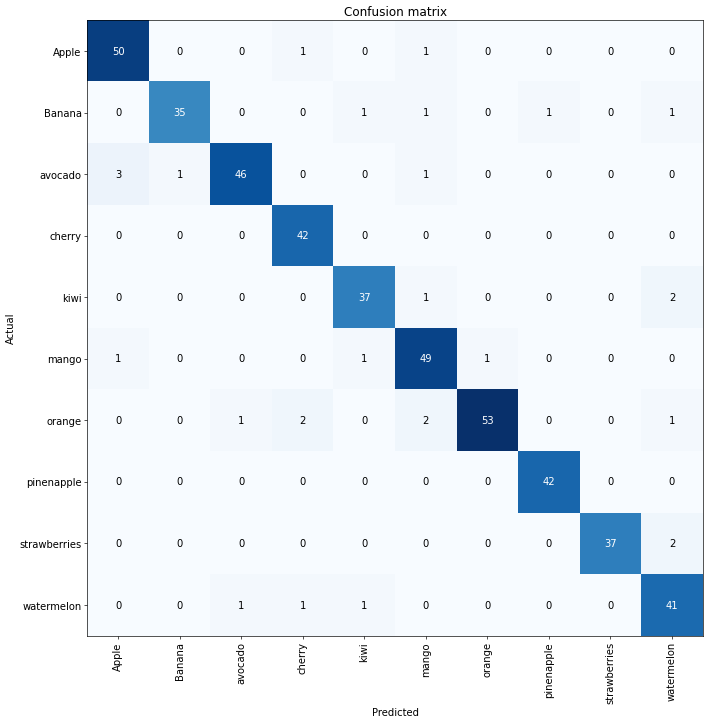

In [14]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 12, 12 ), dpi = 60 )

# We are noticably more tight on the diagnoal.

prediction = watermelon
prediction_index: 9
prediction_scores: tensor([6.7887e-05, 1.9986e-06, 2.6495e-05, 5.6875e-06, 1.1776e-05, 3.9815e-06, 2.8635e-08, 4.0539e-07, 1.7277e-06, 9.9988e-01])




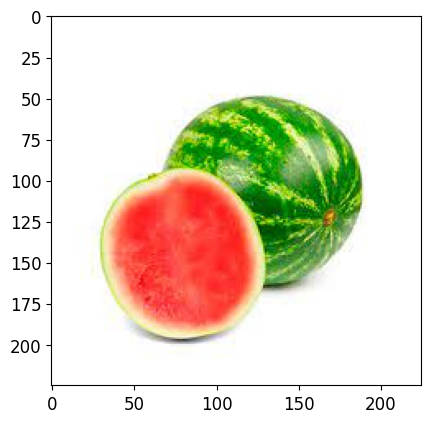

In [15]:
# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "watermelon" )
file_path = os.path.join( file_path, "img_1811.jpeg" )
image = Image.open( file_path )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_index, prediction_scores = learner.predict( file_path )
print( f"prediction = {prediction}\nprediction_index: {prediction_index}\nprediction_scores: {prediction_scores}\n\n" )

In [16]:
# Let's also save our model for posterity
output_path = "/content/gdrive/MyDrive/EAI6010/fruit.model"
learner.export( output_path )
os.listdir( "/content/gdrive/MyDrive/EAI6010/" )

['FaceMask.zip',
 'BrainTumor.zip',
 'Fruits.zip',
 'CatandDog.zip',
 'fruit.model']

prediction = kiwi
prediction_index = 4


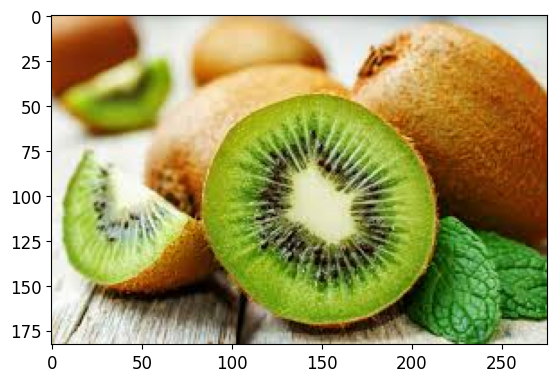

In [17]:
# And to come full circle, let's clear the learner, load the model and make a
# prediction to demonstrate portability
learner = []
learner = load_learner( output_path )

# Let's make a prediction using one of the original images
file_path = os.path.join( images_dir_path, "kiwi" )
file_path = os.path.join( file_path, "img_1471.jpeg" )
from PIL import Image
image = Image.open( file_path )
from matplotlib import pyplot
pyplot.imshow( image )

# Make a prediction
prediction, prediction_index, prediction_scores = learner.predict( file_path )
print( f"prediction = {prediction}\nprediction_index = {prediction_index}" )